In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker  as ticker
import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import calmap
import matplotlib.ticker as ticker

In [2]:
a=pd.read_csv(r'E:\Dataset\Medical.csv', skiprows=2)
pd.set_option('display.max_colwidth', -1)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [3]:
a=a.drop(['Footnotes'],axis=1)
a.drop(a.loc[53:58].index,inplace=True)

In [4]:
a['Medicare Beneficiaries as a Share of Total Population'] = pd.Series(["{0:.0f}%".format(val * 100/1) for val in a['Medicare Beneficiaries as a Share of Total Population']])


In [5]:
a.head(5)

,Location,Medicare Beneficiaries as a Share of Total Population
0,United States,18%
1,Alabama,21%
2,Alaska,13%
3,Arizona,18%
4,Arkansas,21%


In [6]:
a['Medicare Beneficiaries as a Share of Total Population'] = a['Medicare Beneficiaries as a Share of Total Population'].str.rstrip('%').astype('int') 

In [7]:
a.head(5)

,Location,Medicare Beneficiaries as a Share of Total Population
0,United States,18
1,Alabama,21
2,Alaska,13
3,Arizona,18
4,Arkansas,21


In [8]:

#a['Medicare Beneficiaries as a Share of Total Population'] = ([(val * 100/1) for val in a['Medicare Beneficiaries as a Share of Total Population']])

In [9]:
a['Medicare Beneficiaries as a Share of Total Population']=a['Medicare Beneficiaries as a Share of Total Population'].astype(int)

In [10]:
a.head(10)

,Location,Medicare Beneficiaries as a Share of Total Population
0,United States,18
1,Alabama,21
2,Alaska,13
3,Arizona,18
4,Arkansas,21
5,California,16
6,Colorado,16
7,Connecticut,19
8,Delaware,21
9,District of Columbia,14


In [11]:
a.dtypes

Location                                                 object
Medicare Beneficiaries as a Share of Total Population    int32 
dtype: object

In [12]:
a.shape

(53, 2)

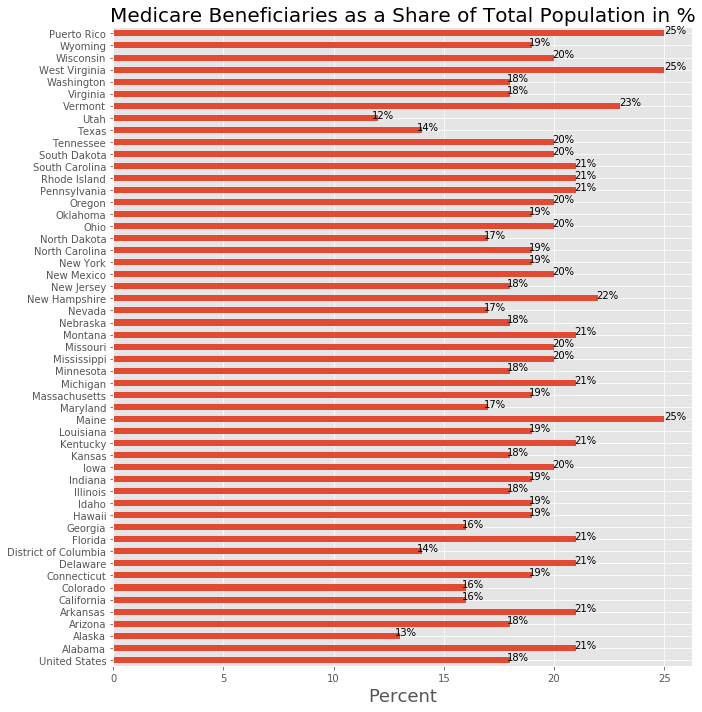

In [13]:


plt.style.use("ggplot")
ax = a.plot(kind='barh',figsize=(10,10),edgecolor=None)
#f= plt.figure(figsize=(10,10))
#ax=f.add_subplot(1,1,1)
ax.set_yticklabels(a['Location'])


#ax=plt.barh(a['Location'],a['Medicare Beneficiaries as a Share of Total Population'])
#ax=plt.tick_params(size=5,labelsize = 10)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()  
    ax.annotate(f'{width:.0f}%', (x + width*1.02, y + height/2), ha='center')
    
plt.xlabel("Percent",fontsize=18)
plt.title("Medicare Beneficiaries as a Share of Total Population in %",fontsize=20)
plt.tight_layout()
ax.get_legend().remove()



In [14]:
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax.xaxis.set_major_locator(ticker.MultipleLocator())
ax.xaxis.set_minor_locator(ticker.MultipleLocator())


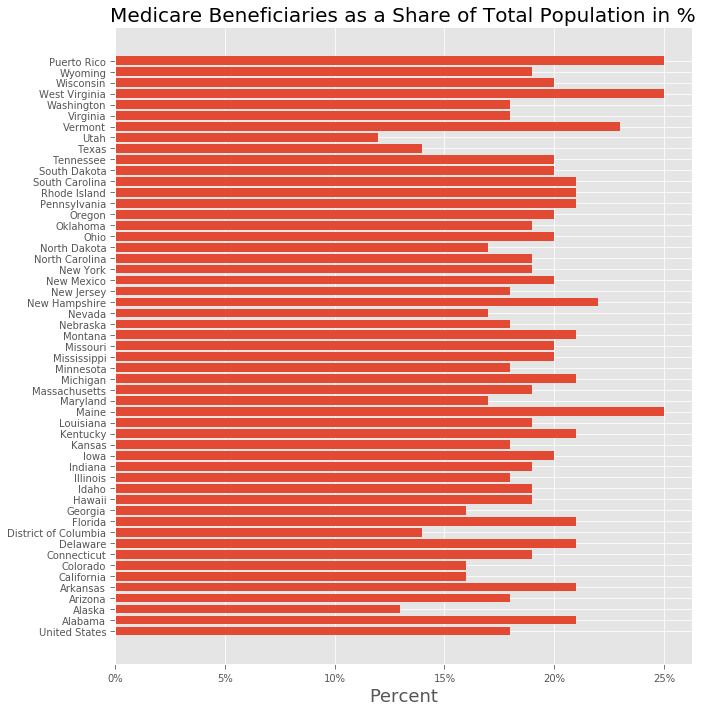

In [15]:
f= plt.figure(figsize=(10,10))
ax=f.add_subplot(1,1,1)

ax.xaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
ax=plt.barh(a['Location'],a['Medicare Beneficiaries as a Share of Total Population'])
plt.tick_params(size=5,labelsize = 10)

plt.xlabel("Percent",fontsize=18)
plt.title("Medicare Beneficiaries as a Share of Total Population in %",fontsize=20)
plt.tight_layout()




In [16]:
index = a.index

In [17]:
a.sort_values(by=['Location'], inplace=True)

In [18]:
#plt.style.use(\'ggplot\')
f = plt.figure(figsize=(10,10))
f.add_subplot(111)
plt.axes(axisbelow=True)
plt.barh(a[\'Location\'],a[\'Medicare Beneficiaries as a Share of Total Population\'])
plt.tick_params(size=5,labelsize = 10)
plt.xlabel("Percent",fontsize=18)
plt.title("Medicare Beneficiaries as a Share of Total Population in %",fontsize=20)
#plt.grid(alpha=0.3)
plt.tight_layout()
p.xaxis.set_major_formatter(ticker.PercentFormatter(1))
from matplotlib.ticker import PercentFormatter'
           

SyntaxError: unexpected character after line continuation character (<ipython-input-18-2398573e411e>, line 5)

In [ ]:
labels=[0,5,10,15,20,25]
plt.xticks(labels)

In [ ]:
from matplotlib.ticker import PercentFormatter
from matplotlib import rc

In [ ]:


plt.style.use("ggplot")
a= a.sort_values('Medicare Beneficiaries as a Share of Total Population')
ax = a.plot(kind='barh',figsize=(10,10),edgecolor=None)
#f= plt.figure(figsize=(10,10))
#ax=f.add_subplot(1,1,1)


#a.sort_values(by='Medicare Beneficiaries as a Share of Total Population',ascending=True)
ax.set_yticklabels(a['Location'])
#ax.get_yticklabels()[1].set_color("red")
#ax.tick_params(size=5)

#ax=plt.barh(a['Location'],a['Medicare Beneficiaries as a Share of Total Population'])
#ax=plt.tick_params(size=5,labelsize = 10)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()  
    ax.annotate(f'{width:.0f}%', (x + width*1.02, y + height/2), ha='center')
    
plt.xlabel("Percent",fontsize=18)
plt.title("Medicare Beneficiaries as a Share of Total Population in %",fontsize=20)
plt.tight_layout()

ax.xaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
plt.xlabel("Percent",fontsize=18)
plt.title("Medicare Beneficiaries as a Share of Total Population in %",fontsize=20)
plt.tight_layout()
ax.get_legend().remove()

In [ ]:
b=pd.read_csv(r'E:\Dataset\raw_data (3).csv', skiprows=2)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [ ]:
b=b.drop(['Footnotes'],axis=1)
b.drop(b.loc[57:68].index,inplace=True)


In [ ]:
b

In [ ]:
b.dtypes

In [ ]:

b.style.format({'Original Medicare': '{:,.0f}','Medicare Advantage': '{:,.0f}','Total': '{:,.0f}'})\
                .background_gradient(cmap='Blues')

In [ ]:
b.style.applymap(

In [ ]:
b.style.background_gradient(cmap='Blues',subset=["Original Medicare"])\
                        .background_gradient(cmap='Reds',subset=["Medicare Advantage"])\
                        .background_gradient(cmap='Greens',subset=["Total"])



In [ ]:
c=pd.read_csv(r'E:\Dataset\raw_data (4).csv', skiprows=2)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [ ]:
c

In [ ]:
c=c.drop(['Footnotes'], axis = 1)
c.drop(c.loc[52:61].index,inplace=True)

In [ ]:
c.head()

In [ ]:
c.dtypes

In [ ]:
c=c.replace(['NR', '<.01'],  [0, .01]) 
c=c.replace(np.nan,0)

In [ ]:
#c['White % of Cases'] = c['White % of Cases'].replace('NR', '0', regex=True)

#c['American Indian or Alaska Native % of Total Population'] = c['American Indian or Alaska Native % of Total Population'].replace('NR', '0', regex=True)
#
c['White % of Cases'] = c['White % of Cases'].astype(float)


In [ ]:
c.sample()

In [ ]:
c=c.drop(['Race Categories Include Hispanic Individuals'],axis=1)

In [ ]:
c

In [ ]:
#c.iloc[:, 1:18].apply(pd.to_numeric).head()
c.loc[:, c.columns != 'Location']=c.loc[:, c.columns != 'Location'].apply(pd.to_numeric)

In [ ]:
c.dtypes

In [ ]:
c.head()

In [ ]:
c.dtypes

In [ ]:
c[c.select_dtypes(include=['number']).columns] *= 100


In [ ]:
c.dtypes

In [ ]:
c.head()

In [ ]:
jj=c.iloc[:,0]
sk=c.iloc[:,1]
pk=c.iloc[:,2]
kl=c.iloc[:,3]
jk=c.iloc[:,4]
fk=c.iloc[:,5]
wek=c.iloc[:,6]
gh=c.iloc[:,7]
ds=c.iloc[:,8]
gf=c.iloc[:,9]
gr=c.iloc[:,10]
cv=c.iloc[:,11]
hf=c.iloc[:,12]
sc=c.iloc[:,13]
wd=c.iloc[:,14]
ty=c.iloc[:,15]
uj=c.iloc[:,16]
index=np.arange(len(c))

plt.figure(figsize=(17,10))

#graph=plt.barh(y=index,width=sk)
#graph1=plt.barh(y=index,width=pk,left=sk)

graph=plt.bar(x=index,height=sk)
graph1=plt.bar(x=index,height=pk,bottom=sk)
graph2=plt.bar(x=index,height=kl,bottom=pk+sk)
graph3=plt.bar(x=index,height=jk,bottom=sk+pk+kl)
grap4=plt.bar(x=index,height=fk,bottom=sk+pk+kl+jk)
graph5=plt.bar(x=index,height=wek,bottom=sk+pk+kl+jk+fk)
grap6=plt.bar(x=index,height=gh,bottom=sk+pk+kl+jk+fk+wek)
graph7=plt.bar(x=index,height=ds,bottom=sk+pk+kl+jk+fk+wek+gh)
grap8=plt.bar(x=index,height=gf,bottom=sk+pk+kl+jk+fk+wek+gh+ds)
graph9=plt.bar(x=index,height=gr,bottom=sk+pk+kl+jk+fk+wek+gh+ds+gf)
graph10=plt.bar(x=index,height=cv,bottom=sk+pk+kl+jk+fk+wek+gh+ds+gf+gr)
graph11=plt.bar(x=index,height=hf,bottom=sk+pk+kl+jk+fk+wek+gh+ds+gf+gr+cv)
graph12=plt.bar(x=index,height=sc,bottom=sk+pk+kl+jk+fk+wek+gh+ds+gf+gr+cv+hf)
graph13=plt.bar(x=index,height=wd,bottom=sk+pk+kl+jk+fk+wek+gh+ds+gf+gr+cv+hf+sc)
graph14=plt.bar(x=index,height=ty,bottom=sk+pk+kl+jk+fk+wek+gh+ds+gf+gr+cv+hf+sc+wd)
graph15=plt.bar(x=index,height=uj,bottom=sk+pk+kl+jk+fk+wek+gh+ds+gf+gr+cv+hf+sc+wd+ty)

plt.xticks(index,jj,rotation=90)





In [ ]:
d=pd.read_csv(r'E:\Dataset\raw_data (6).csv', skiprows=2)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [ ]:
d

In [ ]:
d=d.drop(['Footnotes'], axis = 1)
d.drop(d.loc[57:].index,inplace=True)

In [ ]:
d.head()

In [ ]:
d.dtypes

In [ ]:
#d.loc[:, d.columns != 'Location']=d.loc[:, d.columns != 'Location'].apply(pd.to_numeric)
#d['Number of COVID-19 Cases']= (d['Number of COVID-19 Cases'].str.split()).apply(lambda x: float(d[:,1].replace(',','')))

d=d.replace(",","",regex=True)


In [ ]:
d.sample()

In [ ]:
d.loc[:, d.columns != 'Location']=d.loc[:, d.columns != 'Location'].apply(pd.to_numeric)

In [ ]:
d.dtypes

In [ ]:
d.head()

In [ ]:
d.dtypes

In [ ]:

d.style.background_gradient(cmap='Blues',subset=["Number of COVID-19 Cases"])\
                        .background_gradient(cmap='Reds',subset=["COVID-19 Cases per 1,000,000 Population"])\
                        .background_gradient(cmap='Greens',subset=["Deaths from COVID-19"])\
                        .background_gradient(cmap='Purples',subset=["COVID-19 Deaths per 1,000,000 Population"])\
                        .background_gradient(cmap='Pastel1_r',subset=["COVID-19 Fatality Rate"])\
                        .format("{:.0f}",subset=["COVID-19 Deaths per 1,000,000 Population","Deaths from COVID-19","COVID-19 Cases per 1,000,000 Population","Number of COVID-19 Cases"])

In [ ]:
e=pd.read_csv(r'E:\Dataset\raw_data (14).csv', skiprows=2)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [ ]:
e.head()

In [ ]:
e.drop(e.loc[52:].index,inplace=True)
#e.drop(e.index[0], inplace=True)
e.drop(e.head(1).index,inplace=True)
e.reset_index(drop=True,inplace=True)

In [ ]:
e

In [ ]:
abbv=pd.read_csv(r'E:\Downloads\csvData.csv')

In [ ]:
abbv.head()

In [ ]:
ee= pd.concat([e,abbv['Code']], axis = 1, levels=0).sort_index(axis=1)

In [ ]:
ee.head()

In [ ]:

fig = px.choropleth(ee, geojson=USA-states, locations='Code', color='Total Hospitals',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'Total Hospitals':'Total number of Hospitals'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})



In [ ]:
fig = px.choropleth(ee,  # Input Pandas DataFrame
                    locations="Code",  # DataFrame column with locations
                    color_continuous_scale="Viridis",
                    color='Total Hospitals',
                    #range_color=(0, 12),  # DataFrame column with color values
                    hover_name="Location", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

In [ ]:
f=pd.read_csv(r'E:\Dataset\raw_data (15).csv', skiprows=2)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)



In [ ]:
f.drop(f.loc[52:].index,inplace=True)
f.drop(f.head(1).index,inplace=True)
f.reset_index(drop=True,inplace=True)

In [ ]:
f.head()

In [ ]:
fig, ax = plt.subplots()

#vals = np.array([[60., 32.], [37., 40.], [29., 10.]])
labels = f['Location']
sizes = f['Total Hospital Beds']
labels_vegefruit = f['Location']
sizes_vegefruit = f['Beds per 1,000 Population']

size=0.3


cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

#ax.pie(vals.sum(axis=1), radius=3, colors=outer_colors,
 #      wedgeprops=dict(width=size, edgecolor='w'))
ax.pie(sizes, labels=labels, radius=3, colors=outer_colors,rotatelabels=True,
        wedgeprops=dict(width=size, edgecolor='w'))
    
    
#ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
 #      wedgeprops=dict(width=size, edgecolor='w'))
ax.pie(sizes_vegefruit, labels=labels_vegefruit, radius=2, colors=inner_colors,rotatelabels=True,
       wedgeprops=dict(width=size, edgecolor='w'))

    
    
#ax.set(aspect="equal", title='Total Hospital Beds and Beds/1k Population')
#ax.set(aspect="equal")
plt.title('Total Hospital Beds and Beds/1k Population',y=2)
plt.tight_layout()
plt.show()

In [ ]:

fig, ax = plt.subplots(figsize=(10,8),subplot_kw=dict(aspect="equal"))
res= f['Total Hospital Beds']
#vals = np.array([[60., 32.], [37., 40.], [29., 10.]])
labels = f['Location']
sizes = f['Total Hospital Beds']


cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)

wedges,texts=ax.pie(sizes,labels=labels, colors=outer_colors,startangle=90,rotatelabels=True,
        wedgeprops=dict(width=0.5, edgecolor='w'))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(res[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title('Total Hospital Beds',y=1.2)
plt.tight_layout()
plt.show()

In [ ]:
g=pd.read_csv(r'E:\Dataset\raw_data (16).csv', skiprows=2)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [ ]:
g.head()

In [ ]:
g.drop(g.loc[52:].index,inplace=True)

In [ ]:
g.sample(5)

In [ ]:
g.dropna(inplace=True)

In [ ]:
g.head()

In [ ]:
plt.style.use('seaborn')

In [ ]:
plt.figure(figsize=(10,8))
state=g['State/Local Government']
non=g['Non-Profit']
forp=g['For-Profit']
loc=g['Location']
plt.scatter(state,loc,edgecolor='black',linewidth=1,alpha=0.75,label='State\Local Government Hospital')
plt.scatter(non,loc,edgecolor='black',linewidth=1,alpha=0.75,label='Non-Profit Hospital')
plt.scatter(forp,loc,edgecolor='black',linewidth=1,alpha=0.75,label='For-Profit Hospital')
plt.legend()

plt.xlabel('Hospital Beds/1k population')
plt.title('Hospitals Beds/1k population by Ownership type')
plt.tight_layout()
plt.show()

In [ ]:
h=pd.read_csv(r'E:\Dataset\raw_data (17).csv', skiprows=2)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
h.drop(h.loc[52:].index,inplace=True)


In [ ]:
h=h.replace(np.nan,0)

In [ ]:
h.loc[:, h.columns != 'Location']=h.loc[:, h.columns != 'Location'].astype(int)

In [ ]:
h.head(14)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
state=h['State/Local Government']
non=h['Non-Profit']
forp=h['For-Profit']
loc=h['Location']
sentence=(state,non,forp)

def simpleGeneratorFun(): 
    yield non       
    yield forp           
    yield state            
   
# Driver code to check above generator function 
for value in simpleGeneratorFun():  
    print(value)

In [ ]:

state=h['State/Local Government']
non=h['Non-Profit']
forp=h['For-Profit']
loc=h['Location']
sentence=(state,non,forp)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')



colors = ['r', 'g', 'b']
yticks = [2, 1, 0]
for c, k in zip(colors, yticks):
    
    xs = loc
    ys = value
    
    cs = [c] * len(xs)
    cs[0] = 'c'

    ax.bar(xs, height=value, zs=k, zdir='y', color=cs, alpha=0.8)
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_yticks(yticks)

plt.show()


              

In [ ]:
i=pd.read_csv(r'E:\Dataset\raw_data (21).csv', skiprows=2)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
i.drop(i.loc[52:].index,inplace=True)


In [ ]:
i.head()

In [ ]:
j=pd.read_csv(r'E:\Dataset\raw_data (22).csv', skiprows=2)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
j.drop(j.loc[52:].index,inplace=True)
j=j.drop(['Footnotes'],axis=1)


In [ ]:
j.head()

In [ ]:
k=pd.read_csv(r'E:\Dataset\raw_data (23).csv', skiprows=2)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
k.drop(k.loc[52:].index,inplace=True)

In [ ]:
k.head()

In [ ]:
gh= pd.concat([i,j,k], axis = 1, levels=0).sort_index(axis=1)

In [ ]:
gh.sample()

not working below statements to locate and delete column name

In [ ]:
#gh.iloc[:, 2:3]
#gh.drop(gh.iloc[:, 2:3], inplace = False, axis = 1) 
#gh.drop(columns=[3], axis=1, inplace=False)
gh = gh.loc[:,~gh.columns.duplicated()]

In [ ]:
gh.sample()

In [ ]:
gh.set_index('Location',inplace=True)

In [ ]:
gh.rename(columns = {'Total':'Total Physicians'}, inplace = True)

In [ ]:
gh.head()

In [ ]:
gh.dtypes

In [ ]:

gh.style.background_gradient(cmap='Blues',subset=["ICU Beds"])\
                        .background_gradient(cmap='Reds',subset=["ICU Beds per 10,000 Population"])\
                        .format("{:.1f}")\
                        .background_gradient(cmap='Greens',subset=["Primary Care Physicians"])\
                        .background_gradient(cmap='Purples',subset=["Specialist Physicians"])\
                        .background_gradient(cmap='Pastel1_r',subset=["Total Physicians"])\
                        .background_gradient(cmap='YlOrBr',subset=["Total Residents"])\
                        .format("{:.0f}",subset=["Primary Care Physicians","Specialist Physicians","Total Physicians","ICU Beds","Total Residents"])
                                                                                                           
                        #.background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])\
                        #.format("{:.2f}")\
                        #.format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

In [ ]:
n=pd.read_csv(r'E:\Dataset\usa_county_wise.csv')

In [ ]:
n.head(10)

In [ ]:
n=n.drop(['Country_Region','Admin2','code3'],axis=1)

In [ ]:
n.shape

In [ ]:
pq=n.head(200000)

In [ ]:
#df_data = df_table.groupby(['Last_Update', 'Country_Region'])['Confirmed', 'Deaths'].max().reset_index().fillna(0)
#df_data["Last_Update"] = pd.to_datetime( df_data["Last_Update"]).dt.strftime('%m/%d/%Y')

fig = px.scatter_geo(pq, locations='FIPS', locationmode='ISO-3',
                     lat= 'Lat',
                     lon='Long_',
                     color=np.power(pq["Confirmed"],0.3)-2 , 
                     size= np.power(pq["Confirmed"]+1,0.3)-1,
                     hover_name='Combined_Key',
                     hover_data=['Confirmed'],
                     range_color= [0, max(np.power(pq["Confirmed"],0.3))], 
                     projection="albers usa", animation_frame="Date", 
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='COVID-19: Progression of spread'
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [ ]:
fig = px.choropleth(ee,  # Input Pandas DataFrame
                    locations="Code",  # DataFrame column with locations
                    color_continuous_scale="Viridis",
                    color='Total Hospitals',
                    #range_color=(0, 12),  # DataFrame column with color values
                    hover_name="Location", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State Rankings', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

In [ ]:
m=pd.read_csv(r'E:\Dataset\raw_data (28).csv', skiprows=2)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
m.drop(m.loc[52:].index,inplace=True)
m=m.drop(['Footnotes'],axis=1)

In [ ]:
m